In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import datetime
from tqdm import tqdm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vR7cOF5NSArcxNxYjzDjjTnFNmG-l0zM8WqabuCqNmwKke7VTEMKjR1BamqigAFeRCvbhCylaspQpTG/pub?gid=0&single=true&output=csv'
approval = pd.read_csv(url)
approval

,issue,pollster,start_date,end_date,sample_size,population,approve,disapprove,net,url,sponsor,mode,tracking,wording_notes,partisan,other_notes
0,economy,Ipsos,03/31/2025,04/02/2025,1486,A,37.0,52.0,-15.0,https://www.ipsos.com/sites/default/files/ct/n...,Reuters,Probability Panel,False,NaN,NaN,NaN
1,economy,YouGov,04/05/2025,04/08/2025,1741,A,41.0,51.0,-10.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN
2,economy,YouGov,03/27/2025,03/28/2025,2609,A,48.0,52.0,-4.0,https://www.cbsnews.com/news/opinion-poll-trum...,CBS News,Online Matched Sample,False,NaN,NaN,NaN
3,economy,Harris Insights & Analytics,03/26/2025,03/27/2025,2746,RV,45.0,55.0,-10.0,https://harvardharrispoll.com/wp-content/uploa...,Harvard CAPS,Online Opt-In Panel,False,NaN,NaN,NaN
4,economy,J.L. Partners,03/25/2025,03/27/2025,1001,RV,45.0,55.0,-10.0,https://www.dailymail.co.uk/news/article-14547...,Daily Mail,Online Opt-In Panel,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,education,YouGov,12/26/2026,12/29/2025,1550,A,37.0,49.0,-12.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN
1588,abortion,YouGov,12/26/2026,12/29/2025,1550,A,34.0,48.0,-14.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN
1589,environment,YouGov,12/26/2026,12/29/2025,1550,A,34.0,49.0,-15.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN
1590,healthcare,YouGov,12/26/2026,12/29/2025,1550,A,33.0,57.0,-24.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN


In [4]:
approval.to_csv('president-issue-approval-polling.csv')

In [5]:
approval[approval['issue']=='economy'].shape

(258, 16)

In [6]:
approval['sponsor'] = approval['sponsor'].fillna('na')

In [7]:
approval

,issue,pollster,start_date,end_date,sample_size,population,approve,disapprove,net,url,sponsor,mode,tracking,wording_notes,partisan,other_notes
0,economy,Ipsos,03/31/2025,04/02/2025,1486,A,37.0,52.0,-15.0,https://www.ipsos.com/sites/default/files/ct/n...,Reuters,Probability Panel,False,NaN,NaN,NaN
1,economy,YouGov,04/05/2025,04/08/2025,1741,A,41.0,51.0,-10.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN
2,economy,YouGov,03/27/2025,03/28/2025,2609,A,48.0,52.0,-4.0,https://www.cbsnews.com/news/opinion-poll-trum...,CBS News,Online Matched Sample,False,NaN,NaN,NaN
3,economy,Harris Insights & Analytics,03/26/2025,03/27/2025,2746,RV,45.0,55.0,-10.0,https://harvardharrispoll.com/wp-content/uploa...,Harvard CAPS,Online Opt-In Panel,False,NaN,NaN,NaN
4,economy,J.L. Partners,03/25/2025,03/27/2025,1001,RV,45.0,55.0,-10.0,https://www.dailymail.co.uk/news/article-14547...,Daily Mail,Online Opt-In Panel,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,education,YouGov,12/26/2026,12/29/2025,1550,A,37.0,49.0,-12.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN
1588,abortion,YouGov,12/26/2026,12/29/2025,1550,A,34.0,48.0,-14.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN
1589,environment,YouGov,12/26/2026,12/29/2025,1550,A,34.0,49.0,-15.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN
1590,healthcare,YouGov,12/26/2026,12/29/2025,1550,A,33.0,57.0,-24.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN


In [8]:
ratings = pd.read_csv('pollster_ratings_silver.csv')
ratings

,Pollster,Grade,Predictive Plus-Minus,Mean-reverted bias,Number of polls,cat
0,AtlasIntel,A+@@1,-0.957740,D+0.16@@0.16334188,91,D+
1,Marquette University Law School,A/B@@4,-0.920261,D+0.32@@0.31545374,17,D+
2,The Washington Post,A+@@1,-0.902281,D+0.90@@0.89811021,98,D+
3,Research & Polling Inc.,A@@2,-0.871136,R+0.55@@-0.54944503,44,R+
4,The New York Times/Siena College,A@@2,-0.763947,D+1.41@@1.4121077,116,D+
...,...,...,...,...,...,...
530,Nielson Brothers Polling,C/D@@12,1.946864,D+3.05@@3.0515239,11,D+
531,Ascend Action,C/D@@12,2.282717,D+3.35@@3.3485439,6,D+
532,Jayhawk Consulting Services,C/D@@12,2.353968,D+2.27@@2.2674108,2,D+
533,Fort Hays State University,C/D@@12,2.489170,R+1.10@@-1.0960908,6,R+


In [9]:
ratings[ratings['Pollster']=='Hart Research Associates/Public Opinion Strategies']

,Pollster,Grade,Predictive Plus-Minus,Mean-reverted bias,Number of polls,cat
31,Hart Research Associates/Public Opinion Strate...,B+@@5,-0.250934,D+0.85@@0.85034752,37,D+


In [10]:
# approval[approval['pollster']=='Hart Research Associates/Public Opinion Strategies']

In [11]:
banned_pollsters = ratings[ratings['Grade'].str.contains('F')]['Pollster'].values
banned_pollsters

array(['Strategic Vision LLC', 'Pharos Research Group', 'Research 2000',
       'Big Data Poll', 'Overtime Politics', 'Rethink Priorities',
       'Blumenthal Research Daily', 'CSP Polling', 'KG Polling',
       'OurProgress (The Progress Campaign)', 'TCJ Research'],
      dtype=object)

In [12]:
approval = approval[~approval['pollster'].isin(banned_pollsters)]
approval.shape

(1592, 16)

In [13]:
approval['pollster'].value_counts()

pollster
YouGov                                                438
Ipsos                                                 171
Morning Consult                                       120
AtlasIntel                                             89
Verasight                                              79
Quinnipiac University                                  71
RMG Research                                           61
Harris Insights & Analytics                            57
Echelon Insights                                       45
Beacon Research/Shaw & Co. Research                    43
AP-NORC                                                43
High Point University                                  43
Clarity Campaign Labs                                  36
Gallup                                                 35
Marquette University Law School                        33
Hart Research Associates/Public Opinion Strategies     31
SSRS                                                   24
John 

In [14]:
approval = pd.merge(left=approval, right=ratings[['Pollster', 'Predictive Plus-Minus']], left_on='pollster',
                   right_on='Pollster', how='left')
approval

,issue,pollster,start_date,end_date,sample_size,population,approve,disapprove,net,url,sponsor,mode,tracking,wording_notes,partisan,other_notes,Pollster,Predictive Plus-Minus
0,economy,Ipsos,03/31/2025,04/02/2025,1486,A,37.0,52.0,-15.0,https://www.ipsos.com/sites/default/files/ct/n...,Reuters,Probability Panel,False,NaN,NaN,NaN,Ipsos,0.442898
1,economy,YouGov,04/05/2025,04/08/2025,1741,A,41.0,51.0,-10.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635
2,economy,YouGov,03/27/2025,03/28/2025,2609,A,48.0,52.0,-4.0,https://www.cbsnews.com/news/opinion-poll-trum...,CBS News,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635
3,economy,Harris Insights & Analytics,03/26/2025,03/27/2025,2746,RV,45.0,55.0,-10.0,https://harvardharrispoll.com/wp-content/uploa...,Harvard CAPS,Online Opt-In Panel,False,NaN,NaN,NaN,Harris Insights & Analytics,0.162447
4,economy,J.L. Partners,03/25/2025,03/27/2025,1001,RV,45.0,55.0,-10.0,https://www.dailymail.co.uk/news/article-14547...,Daily Mail,Online Opt-In Panel,False,NaN,NaN,NaN,J.L. Partners,0.197911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,education,YouGov,12/26/2026,12/29/2025,1550,A,37.0,49.0,-12.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635
1588,abortion,YouGov,12/26/2026,12/29/2025,1550,A,34.0,48.0,-14.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635
1589,environment,YouGov,12/26/2026,12/29/2025,1550,A,34.0,49.0,-15.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635
1590,healthcare,YouGov,12/26/2026,12/29/2025,1550,A,33.0,57.0,-24.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635


In [15]:
approval['pollster'].value_counts()

pollster
YouGov                                                438
Ipsos                                                 171
Morning Consult                                       120
AtlasIntel                                             89
Verasight                                              79
Quinnipiac University                                  71
RMG Research                                           61
Harris Insights & Analytics                            57
Echelon Insights                                       45
Beacon Research/Shaw & Co. Research                    43
AP-NORC                                                43
High Point University                                  43
Clarity Campaign Labs                                  36
Gallup                                                 35
Marquette University Law School                        33
Hart Research Associates/Public Opinion Strategies     31
SSRS                                                   24
John 

In [16]:
auxiliary = pd.read_csv('auxiliary_pollster_rating_stats.csv')
auxiliary

,Pollster,Correct calls,Outside MoE,House effect,ADPA,Herding penalty,herd_cat,p_cat
0,AtlasIntel,0.840659,8.8%@@91.208791,R+2.00@@-1.9990723,3.7@@3.6687982,0.096047,2,R+
1,The Washington Post,0.693878,6.1%@@93.877551,D+1.02@@1.0173736,3.6@@3.5756676,0.221841,3,D+
2,Research & Polling Inc.,0.886364,9.1%@@90.9090906,D+0.63@@0.63289553,4.6@@4.642076,0.286276,3,D+
3,The New York Times/Siena College,0.737069,18.1%@@81.896552,D+0.79@@0.79133403,3.2@@3.2483816,0.280332,3,D+
4,Cygnal,0.939655,13.8%@@86.206897,R+0.60@@-0.59704119,3.5@@3.4644768,0.521310,4,R+
...,...,...,...,...,...,...,...,...
93,Digital Research,0.904762,38.1%@@61.904761,R+2.44@@-2.4431372,11.4@@11.413808,0.000000,1,R+
94,Mitchell Research & Communications,0.695122,39%@@60.975611,R+0.45@@-0.44617203,4.4@@4.4410443,0.229193,3,R+
95,Merriman River Group,0.840000,60%@@39.999998,R+3.23@@-3.2347174,10.3@@10.260222,0.000000,1,R+
96,McLaughlin & Associates,0.689655,34.5%@@65.517241,R+4.94@@-4.9392128,6.2@@6.17804,0.000000,1,R+


In [17]:
# house_eff = auxiliary['House effect'].str.extract(r'(\w)\+(\d\.\d\d)@@*.')
house_eff = auxiliary['House effect'].str.extract(r'(\w)\+\d.\d\d.*@@([\d\.\+\-]+)')
house_eff[1] = house_eff[1].astype(float)
house_eff

,0,1
0,R,-1.999072
1,D,1.017374
2,D,0.632896
3,D,0.791334
4,R,-0.597041
...,...,...
93,R,-2.443137
94,R,-0.446172
95,R,-3.234717
96,R,-4.939213


In [18]:
# R --> -1, D --> 1
house_eff[0] = house_eff[0].replace({'R':-1, 'D':1})
house_eff['house_effect'] = house_eff[1]
house_eff

,0,1,house_effect
0,-1,-1.999072,-1.999072
1,1,1.017374,1.017374
2,1,0.632896,0.632896
3,1,0.791334,0.791334
4,-1,-0.597041,-0.597041
...,...,...,...
93,-1,-2.443137,-2.443137
94,-1,-0.446172,-0.446172
95,-1,-3.234717,-3.234717
96,-1,-4.939213,-4.939213


In [19]:
auxiliary['house_effect'] = house_eff['house_effect']
auxiliary = auxiliary.set_index(['Pollster'])
auxiliary

,Correct calls,Outside MoE,House effect,ADPA,Herding penalty,herd_cat,p_cat,house_effect
Pollster,,,,,,,,
AtlasIntel,0.840659,8.8%@@91.208791,R+2.00@@-1.9990723,3.7@@3.6687982,0.096047,2,R+,-1.999072
The Washington Post,0.693878,6.1%@@93.877551,D+1.02@@1.0173736,3.6@@3.5756676,0.221841,3,D+,1.017374
Research & Polling Inc.,0.886364,9.1%@@90.9090906,D+0.63@@0.63289553,4.6@@4.642076,0.286276,3,D+,0.632896
The New York Times/Siena College,0.737069,18.1%@@81.896552,D+0.79@@0.79133403,3.2@@3.2483816,0.280332,3,D+,0.791334
Cygnal,0.939655,13.8%@@86.206897,R+0.60@@-0.59704119,3.5@@3.4644768,0.521310,4,R+,-0.597041
...,...,...,...,...,...,...,...,...
Digital Research,0.904762,38.1%@@61.904761,R+2.44@@-2.4431372,11.4@@11.413808,0.000000,1,R+,-2.443137
Mitchell Research & Communications,0.695122,39%@@60.975611,R+0.45@@-0.44617203,4.4@@4.4410443,0.229193,3,R+,-0.446172
Merriman River Group,0.840000,60%@@39.999998,R+3.23@@-3.2347174,10.3@@10.260222,0.000000,1,R+,-3.234717


In [20]:
def apply_house_eff(data, pollster):
    df = data[data['pollster']==pollster]
    try:
        df['approve_adj'] = df['approve'] + (auxiliary.loc[pollster, 'house_effect'] / 2)
        df['disapprove_adj'] = df['disapprove'] - (auxiliary.loc[pollster, 'house_effect'] / 2)
    except KeyError:
        df['approve_adj'] = df['approve']
        df['disapprove_adj'] = df['disapprove']
    return df

In [21]:
pollsters = approval['pollster'].value_counts().index.values
df_adjs = []
for p in pollsters:
    df = apply_house_eff(approval, p)
    df_adjs.append(df)

approval_adj = pd.concat(df_adjs, axis=0)
approval_adj

,issue,pollster,start_date,end_date,sample_size,population,approve,disapprove,net,url,sponsor,mode,tracking,wording_notes,partisan,other_notes,Pollster,Predictive Plus-Minus,approve_adj,disapprove_adj
1,economy,YouGov,04/05/2025,04/08/2025,1741,A,41.0,51.0,-10.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,41.249587,50.750413
2,economy,YouGov,03/27/2025,03/28/2025,2609,A,48.0,52.0,-4.0,https://www.cbsnews.com/news/opinion-poll-trum...,CBS News,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,48.249587,51.750413
5,economy,YouGov,04/13/2025,04/15/2025,1329,RV,45.0,51.0,-6.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,45.249587,50.750413
6,economy,YouGov,04/13/2025,04/15/2025,1512,A,42.0,49.0,-7.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,42.249587,48.750413
10,economy,YouGov,04/19/2025,04/22/2025,1625,A,43.0,54.0,-11.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,43.249587,53.750413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,immigration,The Washington Post,06/10/2025,06/10/2025,1015,A,37.0,52.0,-15.0,https://www.washingtonpost.com/documents/e75c5...,na,Probability Panel,False,NaN,NaN,NaN,The Washington Post,-0.902281,37.508687,51.491313
854,epstein_files,McLaughlin & Associates,07/21/2025,07/24/2025,2000,RV,23.3,55.7,-32.4,https://americasnewmajorityproject.com/wp-cont...,America's New Majority Project,Online Opt-In Panel,False,NaN,REP,NaN,McLaughlin & Associates,1.412199,20.830394,58.169606
1279,immigration,"Normington, Petts & Associates",09/11/2025,09/16/2025,800,LV,51.0,49.0,2.0,https://www.thirdway.org/memo/americans-caught...,Third Way,NaN,False,Immigration enforcement & ICE raids,NaN,NaN,NaN,NaN,51.000000,49.000000
1305,immigration,NewsNation,10/27/2025,10/29/2025,1159,A,47.0,52.0,-5.0,https://www.newsnationnow.com/polls/full-poll-...,na,Online Opt-In Panel,False,NaN,NaN,NaN,NewsNation,0.614459,47.000000,52.000000


In [22]:
approval = approval_adj.copy()
# approval.head()

In [23]:
approval['pollster'].value_counts()

pollster
YouGov                                                438
Ipsos                                                 171
Morning Consult                                       120
AtlasIntel                                             89
Verasight                                              79
Quinnipiac University                                  71
RMG Research                                           61
Harris Insights & Analytics                            57
Echelon Insights                                       45
High Point University                                  43
Beacon Research/Shaw & Co. Research                    43
AP-NORC                                                43
Clarity Campaign Labs                                  36
Gallup                                                 35
Marquette University Law School                        33
Hart Research Associates/Public Opinion Strategies     31
SSRS                                                   24
John 

In [24]:
approval[approval['issue']=='economy'].shape

(258, 20)

In [25]:
approval['poll_id'] = pd.factorize(approval['pollster'] + approval['end_date'] + approval['sponsor'] + approval['issue'])[0]
approval.head(7)

,issue,pollster,start_date,end_date,sample_size,population,approve,disapprove,net,url,...,mode,tracking,wording_notes,partisan,other_notes,Pollster,Predictive Plus-Minus,approve_adj,disapprove_adj,poll_id
1,economy,YouGov,04/05/2025,04/08/2025,1741,A,41.0,51.0,-10.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,41.249587,50.750413,0
2,economy,YouGov,03/27/2025,03/28/2025,2609,A,48.0,52.0,-4.0,https://www.cbsnews.com/news/opinion-poll-trum...,...,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,48.249587,51.750413,1
5,economy,YouGov,04/13/2025,04/15/2025,1329,RV,45.0,51.0,-6.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,45.249587,50.750413,2
6,economy,YouGov,04/13/2025,04/15/2025,1512,A,42.0,49.0,-7.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,42.249587,48.750413,2
10,economy,YouGov,04/19/2025,04/22/2025,1625,A,43.0,54.0,-11.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,43.249587,53.750413,3
17,economy,YouGov,04/25/2025,04/28/2025,1785,A,41.0,51.0,-10.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,41.249587,50.750413,4
18,economy,YouGov,02/26/2025,02/28/2025,2311,A,51.0,49.0,2.0,https://www.cbsnews.com/news/trump-elon-musk-g...,...,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,51.249587,48.750413,5


In [26]:
approval['pollster_id'] = pd.factorize(approval['pollster'] + approval['sponsor'].fillna('none'))[0]

In [27]:
def pipeline(data: pd.DataFrame):
    dup = data[data.duplicated(subset='poll_id')]
    ndup = data[~data.duplicated(subset='poll_id')]
    dup_a = dup[dup['population'].isin(['A'])]
    df = pd.concat([dup_a, ndup], axis=0)
    
    dup = df[df.duplicated(subset='poll_id')]
    ndup = df[~df.duplicated(subset='poll_id')]
    dup_lv = dup[dup['population'].isin(['RV'])]
    df = pd.concat([dup_lv, ndup], axis=0)
    
#     try:
    df['end_date'] = pd.to_datetime(df['end_date'])
#     except ValueError:
#         print(df['end_date'])
#         raise ValueError()
    df['start_date'] = pd.to_datetime(df['start_date'])
    
    return df

In [28]:
approval['poll_id'].value_counts().index.values.shape

(1585,)

In [29]:
approval = approval.rename({'Predictive Plus-Minus':'pred_plus_minus'}, axis=1)

In [30]:
banned_pollsters_aux = pd.read_csv('banned_pollsters_aux.csv')['banned_pollsters'].values
banned_pollsters_aux

array(['Rasmussen Reports', 'TIPP Insights', 'Trafalgar Group',
       'Trafalgar Group/Insider Advantage'], dtype=object)

In [31]:
approval = approval[~approval['pollster'].isin(banned_pollsters_aux)]
approval = pipeline(approval)
approval.head()

,issue,pollster,start_date,end_date,sample_size,population,approve,disapprove,net,url,...,tracking,wording_notes,partisan,other_notes,Pollster,pred_plus_minus,approve_adj,disapprove_adj,poll_id,pollster_id
5,economy,YouGov,2025-04-13,2025-04-15,1329,RV,45.0,51.0,-6.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,False,NaN,NaN,NaN,YouGov,0.047635,45.249587,50.750413,2,0
116,inflation,YouGov,2025-04-13,2025-04-15,1329,RV,42.0,55.0,-13.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,False,NaN,NaN,NaN,YouGov,0.047635,42.249587,54.750413,40,0
6,economy,YouGov,2025-04-13,2025-04-15,1512,A,42.0,49.0,-7.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,False,NaN,NaN,NaN,YouGov,0.047635,42.249587,48.750413,2,0
121,inflation,YouGov,2025-04-13,2025-04-15,1512,A,37.0,55.0,-18.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,False,NaN,NaN,NaN,YouGov,0.047635,37.249587,54.750413,40,0
1264,economy,Ipsos,2025-10-15,2025-10-20,4385,A,35.0,53.0,-18.0,https://www.reuters.com/world/us/trumps-approv...,...,False,NaN,NaN,NaN,Ipsos,0.442898,35.387369,52.612631,581,5


In [32]:
approval['pollster'].value_counts()

pollster
YouGov                                                438
Ipsos                                                 169
Morning Consult                                       119
AtlasIntel                                             89
Verasight                                              79
Quinnipiac University                                  69
RMG Research                                           61
Harris Insights & Analytics                            57
Echelon Insights                                       45
High Point University                                  43
Beacon Research/Shaw & Co. Research                    43
AP-NORC                                                43
Clarity Campaign Labs                                  36
Gallup                                                 35
Marquette University Law School                        33
Hart Research Associates/Public Opinion Strategies     31
SSRS                                                   24
John 

In [33]:
approval[approval['issue']=='economy'].shape

(256, 22)

In [34]:
approval.shape

(1587, 22)

In [35]:
# Drop unnecessary columns
approval = approval.drop(['mode', 'tracking', 'partisan', 'wording_notes'], axis='columns')

In [36]:
def zone_flood_checker(data, pid, date):
    """
    Check whether there are multiple polls from the same pollster + same sponsor (if applicable) within the last two weeks, 
    which could indicate "flooding the zone." Return number of polls from same pollster/sponsor in last two weeks.

    :param data: Polls dataframe.
    :param pid: Pollster ID, specified in the polls dataframe as the column pollster_id.
    :param date: Date at which specified poll is conducted. Corresponds to column end_date in polls dataframe.
    """
    thres = date - pd.Timedelta(weeks=2)
    df = data[ (data['pollster_id'] == pid) & (pd.to_datetime(data['end_date']) >= thres) ]
    return max(df.shape[0], 1)

In [37]:
def avgs_pipeline(data: pd.DataFrame, date: datetime.date, issue: str):
    state_pivot = pipeline(data)
    # state_pivot['end_date'] = pd.to_datetime(state_pivot['end_date'])
    # state_pivot['pred_plus_minus'] = state_pivot['pred_plus_minus'].map(lambda x: -x)
    state_pivot = state_pivot[state_pivot['end_date'] <= pd.to_datetime(date)]
    state_pivot['population'] = state_pivot['population'].astype(str).map(lambda x: x.strip())
    state_pivot = state_pivot[state_pivot['issue'] == issue]
    
    total_num_polls = state_pivot.shape[0]

    # Sample size weights
    total_sample_size = np.sum(state_pivot['sample_size'])
    state_pivot['sample_size_weights'] = (state_pivot['sample_size'].map(lambda x: np.sqrt(min(x, 3000))) / np.sqrt(np.median(state_pivot['sample_size'].map(lambda x: min(x, 2000)))))
    # print(np.median(state_pivot['sample_size'].map(lambda x: min(x, 5000))))
    state_pivot['sample_size_weights'] /= np.sum(state_pivot['sample_size_weights'])
    
    # Time weights
    # Variation of the equation used here: https://polls.votehub.us/
    latest_date = pd.Timestamp(date)
    delta = state_pivot['end_date'].apply(lambda x: (latest_date - x).days)# (latest_date - state_pivot['end_date']).apply(lambda x: x.days)
    # linear_weights = (1 - delta/((latest_date - state_pivot['end_date'].min()).days + 1))
    linear_weights = delta.map(lambda x: (1 - x/45) if x < 45 else 0)
#     except TypeError:
#         print('TypeError')
#         print(type(delta))
#         print(type((latest_date - state_pivot['end_date'].min()).days))
    exp_weights = 0.1**(delta/(35))
    state_pivot['time_weights'] =  0.1 * linear_weights + 0.9 * exp_weights
    # state_pivot['time_weights'] /= np.sum(state_pivot['time_weights'])
    
    # Quality weights
    rel_quality = state_pivot['pred_plus_minus']
    def quality_weight(rel_qual):
        if np.isnan(rel_qual):
            return 0.2
        if rel_qual > 0.5: # Utilizing predictive plus-minus from Silver Bulletin's ratings
            return 0.2
        # return np.sqrt( (-rel_qual+1)/2.4 ) + 0.2
        return np.exp(-rel_qual/1.3)
    state_pivot['quality_weights'] = rel_quality.map(quality_weight)
    # state_pivot['quality_weights'] /= np.sum(state_pivot['quality_weights'])
    
    # Population weights
    def population_weight(population):
        if population == 'RV':
            return 0.8
        elif population == 'LV':
            return 0.6
        return 1
    state_pivot['population_weights'] = state_pivot['population'].map(population_weight)

    
    # Multiple polls in short window (aka "flooding the zone")
    def zone_flood_weight(pid, date):
        num_polls = zone_flood_checker(approval, pid, date)
        return 1 / np.sqrt(num_polls)
    state_pivot['zone_flood_weight'] = state_pivot[['pollster_id', 'end_date']].apply(
        lambda x: zone_flood_weight(x['pollster_id'], x['end_date']),
        axis=1
    )

    # Gather the weights together
    state_pivot['total_weights'] = (state_pivot['sample_size_weights'] * state_pivot['time_weights'] * 
                                    state_pivot['quality_weights'] * state_pivot['population_weights'] * state_pivot['zone_flood_weight'])
    state_pivot['total_weights'] /= np.sum(state_pivot['total_weights']) # Normalization step
    
    return state_pivot

In [38]:
avgs_pipeline(approval, datetime.datetime.today(), 'inflation')['end_date'].min()

Timestamp('2025-01-21 00:00:00')

In [39]:
approval['end_date']

5      2025-04-15
116    2025-04-15
6      2025-04-15
121    2025-04-15
1264   2025-10-20
          ...    
345    2025-06-10
854    2025-07-24
1279   2025-09-16
1305   2025-10-29
1352   2025-10-31
Name: end_date, Length: 1587, dtype: datetime64[ns]

In [40]:
def approval_over_time(data: pd.DataFrame, min_date: datetime.date, issue: str):
    date_range = pd.date_range(start=min_date, end=datetime.datetime.today(), freq='d', inclusive='both')
    yes_averages = []
    no_averages = []
    yes_stdevs = []
    no_stdevs = []
    issue_col = []
    for date in tqdm(date_range):
#         try:
        pipelined_df = avgs_pipeline(data, date, issue)
#         except TypeError:
#             print('TypeError')
#             print(date)
        yes_avg = np.sum(pipelined_df['approve_adj'] * pipelined_df['total_weights'])
        no_avg = np.sum(pipelined_df['disapprove_adj'] * pipelined_df['total_weights'])
        yes_std = np.sqrt(np.sum(pipelined_df['total_weights'] * (pipelined_df['approve_adj'] - yes_avg)**2))
        no_std = np.sqrt(np.sum(pipelined_df['total_weights'] * (pipelined_df['disapprove_adj'] - no_avg)**2))
        yes_averages.append(yes_avg)
        no_averages.append(no_avg)
        yes_stdevs.append(yes_std)
        no_stdevs.append(no_std)
        issue_col.append(issue)
    
    return pd.DataFrame({'Date':date_range, 'approve_mean':yes_averages, 'disapprove_mean':no_averages, 'Issue':issue_col, 'approve_std':yes_stdevs, 'disapprove_std':no_stdevs}), avgs_pipeline(data, datetime.datetime.today(), issue)

In [41]:
issues = ['economy', 'immigration', 'foreign_policy', 'inflation', 'trade_tariffs', 'healthcare', 'crime']

In [42]:
approval_avg_econ, polls_df_econ = approval_over_time(approval, datetime.date(2025, 1, 21), 'economy')
approval_avg_econ

100%|████████████████████████████████████████████████████████████████████████████████| 345/345 [01:05<00:00,  5.28it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-21,42.387369,35.612631,economy,0.000000,0.000000
1,2025-01-22,42.387369,35.612631,economy,0.000000,0.000000
2,2025-01-23,48.004625,46.983657,economy,2.365139,4.787757
3,2025-01-24,48.004426,46.983255,economy,2.365333,4.788149
4,2025-01-25,48.004234,46.982865,economy,2.365521,4.788530
...,...,...,...,...,...,...
340,2025-12-27,37.839323,58.160600,economy,3.294621,4.353135
341,2025-12-28,37.839947,58.159460,economy,3.295967,4.353973
342,2025-12-29,37.840524,58.158377,economy,3.297433,4.354885
343,2025-12-30,37.840703,58.157066,economy,3.298865,4.355513


In [43]:
# line = px.line(approval_avg_infl, x='Date', y=['Approve', 'Disapprove'])
# line.update_traces(hovertemplate=None)
# line.update_layout(hovermode='x unified')
# fig = go.Figure(data=line.data)
# fig.update_layout(
#     title='President Trump Approval Rating',
#     xaxis_title='Date',
#     yaxis_title='%',
#     legend_title='Legend',
#     hovermode='x unified'
# )
# fig.show()

In [44]:
approval_avg_imm, polls_df_imm = approval_over_time(approval, datetime.date(2025, 1, 21), 'immigration')
approval_avg_imm

100%|████████████████████████████████████████████████████████████████████████████████| 345/345 [00:57<00:00,  6.00it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-21,46.387369,37.612631,immigration,0.000000,0.000000
1,2025-01-22,46.387369,37.612631,immigration,0.000000,0.000000
2,2025-01-23,49.456383,48.134243,immigration,1.292205,4.430112
3,2025-01-24,49.456274,48.133871,immigration,1.292311,4.430475
4,2025-01-25,49.456169,48.133510,immigration,1.292413,4.430828
...,...,...,...,...,...,...
340,2025-12-27,44.345362,52.491981,immigration,3.077013,4.138726
341,2025-12-28,44.345247,52.491723,immigration,3.076107,4.138606
342,2025-12-29,44.345125,52.491522,immigration,3.074989,4.138337
343,2025-12-30,44.344505,52.491118,immigration,3.073770,4.137507


In [45]:
# approval_avg_imm.head(30)

In [46]:
approval_avg_fp, polls_df_fp = approval_over_time(approval, datetime.date(2025, 1, 21), 'foreign_policy')
approval_avg_fp

100%|████████████████████████████████████████████████████████████████████████████████| 345/345 [00:36<00:00,  9.53it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-21,39.387369,36.612631,foreign_policy,0.000000,0.000000
1,2025-01-22,39.387369,36.612631,foreign_policy,0.000000,0.000000
2,2025-01-23,39.387369,36.612631,foreign_policy,0.000000,0.000000
3,2025-01-24,39.387369,36.612631,foreign_policy,0.000000,0.000000
4,2025-01-25,39.387369,36.612631,foreign_policy,0.000000,0.000000
...,...,...,...,...,...,...
340,2025-12-27,40.076700,54.992760,foreign_policy,3.764384,3.578450
341,2025-12-28,40.073504,54.995848,foreign_policy,3.765978,3.579027
342,2025-12-29,40.069728,54.999392,foreign_policy,3.767777,3.579617
343,2025-12-30,40.065613,55.002971,foreign_policy,3.769583,3.580136


In [47]:
approval_avg_infl, polls_df_infl = approval_over_time(approval, datetime.date(2025, 1, 28), 'inflation')
approval_avg_infl

100%|████████████████████████████████████████████████████████████████████████████████| 338/338 [00:48<00:00,  6.93it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-28,41.598821,39.439764,inflation,4.761991,0.899176
1,2025-01-29,41.597132,39.440082,inflation,4.762445,0.899261
2,2025-01-30,41.595541,39.440383,inflation,4.762872,0.899342
3,2025-01-31,41.594066,39.440661,inflation,4.763267,0.899417
4,2025-02-01,41.592726,39.440914,inflation,4.763626,0.899484
...,...,...,...,...,...,...
333,2025-12-27,33.406894,63.596653,inflation,2.543795,3.596545
334,2025-12-28,33.412452,63.595068,inflation,2.538877,3.596766
335,2025-12-29,33.418660,63.593560,inflation,2.533308,3.597021
336,2025-12-30,33.423304,63.592033,inflation,2.529022,3.596511


In [48]:
approval_avg_trade, polls_df_trade = approval_over_time(approval, datetime.date(2025, 1, 28), 'trade_tariffs')
approval_avg_trade

100%|████████████████████████████████████████████████████████████████████████████████| 338/338 [00:52<00:00,  6.44it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-28,42.378292,38.604389,trade_tariffs,5.668544,1.432066
1,2025-01-29,42.376959,38.604726,trade_tariffs,5.668066,1.431946
2,2025-01-30,42.375721,38.605039,trade_tariffs,5.667622,1.431833
3,2025-01-31,42.374594,38.605323,trade_tariffs,5.667218,1.431731
4,2025-02-01,42.373596,38.605576,trade_tariffs,5.666860,1.431641
...,...,...,...,...,...,...
333,2025-12-27,37.854028,57.550674,trade_tariffs,3.409245,5.180854
334,2025-12-28,37.854432,57.553296,trade_tariffs,3.411001,5.181754
335,2025-12-29,37.854692,57.556450,trade_tariffs,3.412977,5.182804
336,2025-12-30,37.854522,57.558164,trade_tariffs,3.415039,5.184211


In [49]:
approval_avg_healthcare, polls_df_healthcare = approval_over_time(approval, datetime.date(2025, 1, 28), 'healthcare')
approval_avg_healthcare

100%|████████████████████████████████████████████████████████████████████████████████| 338/338 [00:24<00:00, 13.71it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-28,39.000464,52.999536,healthcare,0.000000,0.000000
1,2025-01-29,39.000464,52.999536,healthcare,0.000000,0.000000
2,2025-01-30,39.000464,52.999536,healthcare,0.000000,0.000000
3,2025-01-31,39.000464,52.999536,healthcare,0.000000,0.000000
4,2025-02-01,39.000464,52.999536,healthcare,0.000000,0.000000
...,...,...,...,...,...,...
333,2025-12-27,32.280967,62.355182,healthcare,4.097103,3.110005
334,2025-12-28,32.278659,62.355755,healthcare,4.098025,3.110165
335,2025-12-29,32.518388,60.960600,healthcare,3.577185,3.625286
336,2025-12-30,32.516535,60.959632,healthcare,3.577611,3.625728


In [50]:
approval_avg_crime, polls_df_crime = approval_over_time(approval, datetime.date(2025, 1, 28), 'crime')
approval_avg_crime

100%|████████████████████████████████████████████████████████████████████████████████| 338/338 [00:21<00:00, 15.74it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-28,48.249587,34.750413,crime,0.000000,0.000000
1,2025-01-29,48.249587,34.750413,crime,0.000000,0.000000
2,2025-01-30,48.249587,34.750413,crime,0.000000,0.000000
3,2025-01-31,48.249587,34.750413,crime,0.000000,0.000000
4,2025-02-01,48.249587,34.750413,crime,0.000000,0.000000
...,...,...,...,...,...,...
333,2025-12-27,47.157711,49.093854,crime,2.508767,3.505711
334,2025-12-28,47.160274,49.092725,crime,2.506282,3.506197
335,2025-12-29,47.163171,49.091513,crime,2.503304,3.506671
336,2025-12-30,47.166374,49.089783,crime,2.499287,3.506510


In [51]:
## NOT ADDED TO BROADER GRAPH
approval_avg_ukraine, polls_df_ukraine = approval_over_time(approval, datetime.date(2025, 1, 28), 'ukraine')
approval_avg_ukraine

100%|████████████████████████████████████████████████████████████████████████████████| 338/338 [00:20<00:00, 16.35it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-28,46.000464,50.999536,ukraine,0.000000,0.000000
1,2025-01-29,46.000464,50.999536,ukraine,0.000000,0.000000
2,2025-01-30,46.000464,50.999536,ukraine,0.000000,0.000000
3,2025-01-31,46.000464,50.999536,ukraine,0.000000,0.000000
4,2025-02-01,46.000464,50.999536,ukraine,0.000000,0.000000
...,...,...,...,...,...,...
333,2025-12-27,33.440272,57.580448,ukraine,2.690004,3.391473
334,2025-12-28,33.435935,57.583049,ukraine,2.678947,3.382580
335,2025-12-29,33.430927,57.586199,ukraine,2.666229,3.372766
336,2025-12-30,33.423060,57.587296,ukraine,2.652772,3.363343


In [52]:
## NOT ADDED TO BROADER GRAPH
approval_avg_pali, polls_df_pali = approval_over_time(approval, datetime.date(2025, 1, 28), 'israel_palestine')
approval_avg_pali

100%|████████████████████████████████████████████████████████████████████████████████| 338/338 [00:13<00:00, 24.39it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-28,44.000464,52.999536,israel_palestine,0.000000,0.000000
1,2025-01-29,44.000464,52.999536,israel_palestine,0.000000,0.000000
2,2025-01-30,44.000464,52.999536,israel_palestine,0.000000,0.000000
3,2025-01-31,44.000464,52.999536,israel_palestine,0.000000,0.000000
4,2025-02-01,44.000464,52.999536,israel_palestine,0.000000,0.000000
...,...,...,...,...,...,...
333,2025-12-27,38.725832,54.691351,israel_palestine,7.401804,6.503313
334,2025-12-28,38.725064,54.709180,israel_palestine,7.391693,6.488992
335,2025-12-29,38.725678,54.728144,israel_palestine,7.381963,6.474064
336,2025-12-30,38.725167,54.742749,israel_palestine,7.370723,6.459513


In [53]:
approval_avg_issues = pd.concat([approval_avg_econ, approval_avg_imm, approval_avg_fp, approval_avg_infl, approval_avg_trade, approval_avg_healthcare,
                                approval_avg_crime], axis=0)

# 95% confidence intervals
approval_avg_issues['approve_CI_upper'] = approval_avg_issues['approve_mean'] + 1.96*approval_avg_issues['approve_std']
approval_avg_issues['approve_CI_lower'] = approval_avg_issues['approve_mean'] - 1.96*approval_avg_issues['approve_std']
approval_avg_issues['disapprove_CI_upper'] = approval_avg_issues['disapprove_mean'] + 1.96*approval_avg_issues['disapprove_std']
approval_avg_issues['disapprove_CI_lower'] = approval_avg_issues['disapprove_mean'] - 1.96*approval_avg_issues['disapprove_std']

approval_avg_issues

,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std,approve_CI_upper,approve_CI_lower,disapprove_CI_upper,disapprove_CI_lower
0,2025-01-21,42.387369,35.612631,economy,0.000000,0.000000,42.387369,42.387369,35.612631,35.612631
1,2025-01-22,42.387369,35.612631,economy,0.000000,0.000000,42.387369,42.387369,35.612631,35.612631
2,2025-01-23,48.004625,46.983657,economy,2.365139,4.787757,52.640297,43.368952,56.367660,37.599654
3,2025-01-24,48.004426,46.983255,economy,2.365333,4.788149,52.640479,43.368373,56.368028,37.598482
4,2025-01-25,48.004234,46.982865,economy,2.365521,4.788530,52.640655,43.367812,56.368384,37.597346
...,...,...,...,...,...,...,...,...,...,...
333,2025-12-27,47.157711,49.093854,crime,2.508767,3.505711,52.074894,42.240528,55.965048,42.222661
334,2025-12-28,47.160274,49.092725,crime,2.506282,3.506197,52.072586,42.247961,55.964870,42.220580
335,2025-12-29,47.163171,49.091513,crime,2.503304,3.506671,52.069647,42.256695,55.964587,42.218439
336,2025-12-30,47.166374,49.089783,crime,2.499287,3.506510,52.064976,42.267771,55.962542,42.217024


In [54]:
approval_avg_econ = approval_avg_issues[approval_avg_issues['Issue'] == 'economy']
approval_avg_imm = approval_avg_issues[approval_avg_issues['Issue'] == 'immigration']
approval_avg_fp = approval_avg_issues[approval_avg_issues['Issue'] == 'foreign_policy']
approval_avg_infl = approval_avg_issues[approval_avg_issues['Issue'] == 'inflation']
approval_avg_trade = approval_avg_issues[approval_avg_issues['Issue'] == 'trade_tariffs']
approval_avg_healthcare = approval_avg_issues[approval_avg_issues['Issue'] == 'healthcare']
approval_avg_crime = approval_avg_issues[approval_avg_issues['Issue'] == 'crime']

In [55]:
approval_avg_econ.to_csv('approval_stats_econ.csv')
approval_avg_imm.to_csv('approval_stats_imm.csv')
approval_avg_fp.to_csv('approval_stats_fp.csv')
approval_avg_infl.to_csv('approval_stats_infl.csv')
approval_avg_trade.to_csv('approval_stats_trade.csv')
approval_avg_healthcare.to_csv('approval_stats_healthcare.csv')
approval_avg_crime.to_csv('approval_stats_crime.csv')

In [56]:
polls_df_econ.head()

,issue,pollster,start_date,end_date,sample_size,population,approve,disapprove,net,url,...,approve_adj,disapprove_adj,poll_id,pollster_id,sample_size_weights,time_weights,quality_weights,population_weights,zone_flood_weight,total_weights
5,economy,YouGov,2025-04-13,2025-04-15,1329,RV,45.0,51.0,-6.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,45.249587,50.750413,2,0,0.003641,3.354834e-08,0.964021,0.8,0.063888,7.329866e-10
6,economy,YouGov,2025-04-13,2025-04-15,1512,A,42.0,49.0,-7.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,42.249587,48.750413,2,0,0.003884,3.354834e-08,0.964021,1.0,0.063888,9.772810e-10
1264,economy,Ipsos,2025-10-15,2025-10-20,4385,A,35.0,53.0,-18.0,https://www.reuters.com/world/us/trumps-approv...,...,35.387369,52.612631,581,5,0.005470,7.890411e-03,0.711279,1.0,0.235702,8.813190e-04
1,economy,YouGov,2025-04-05,2025-04-08,1741,A,41.0,51.0,-10.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,41.249587,50.750413,0,0,0.004167,2.116757e-08,0.964021,1.0,0.062622,6.485685e-10
2,economy,YouGov,2025-03-27,2025-03-28,2609,A,48.0,52.0,-4.0,https://www.cbsnews.com/news/opinion-poll-trum...,...,48.249587,51.750413,1,1,0.005101,1.026562e-08,0.964021,1.0,0.169031,1.039307e-09


In [57]:
polls_df_econ.columns.values

array(['issue', 'pollster', 'start_date', 'end_date', 'sample_size',
       'population', 'approve', 'disapprove', 'net', 'url', 'sponsor',
       'other_notes', 'Pollster', 'pred_plus_minus', 'approve_adj',
       'disapprove_adj', 'poll_id', 'pollster_id', 'sample_size_weights',
       'time_weights', 'quality_weights', 'population_weights',
       'zone_flood_weight', 'total_weights'], dtype=object)

In [58]:
def format_polls_display_table(polls_df):
    display_df = polls_df[['pollster', 'sponsor', 'start_date', 'end_date', 'issue', 'sample_size', 'population', 'approve', 'disapprove', 'net',
                      'total_weights', 'url']]
    display_df['sponsor'] = display_df['sponsor'].map(lambda x: ('^Sponsor: ' + x + '^') if x != 'na' else '')
    # display_df['sponsor'] = display_df['sponsor'].fillna('')
    display_df = display_df.sort_values(['end_date'], ascending=False)
    display_df = display_df.rename({'pollster':'Pollster', 'approve':'Approve', 'disapprove':'Disapprove', 'net':'Net', 'total_weights':'Weight', 'start_date':'Start Date', 'end_date':'End Date', 'url':'URL',
                                   'issue':'Issue'}, axis='columns')
    display_df['Issue'] = display_df['Issue'].replace({
        'economy':'Economy', 'immigration':'Immigration', 'inflation':'Inflation/prices', 'foreign_policy':'Foreign policy', 'trade_tariffs':'Trade/tariffs', 'healthcare':'Healthcare', 'crime':'Crime'
    })
    display_df['Sample'] = display_df['sample_size'].astype(int).astype(str) + ' ' + display_df['population']
    # display_df['end_date'] = display_df['end_date'].map(lambda x: datetime.datetime.strptime(datetime.datetime.fromtimestamp(x), '%m/%d/%Y').strftime('%Y-%m-%d'))
    # display_df['Date'] = pd.to_datetime(display_df['startdate']).astype(str) + ' - ' + display_df['end_date'].astype(str)
    display_df['Start Date'] = pd.to_datetime(display_df['Start Date']).astype(str)
    display_df['End Date'] = display_df['End Date'].astype(str)
    display_df = display_df.reset_index()
    # display_df = display_df.drop(['sample_size', 'population'], axis='columns')
    display_df['Pollster'] = '<a href="' + display_df['URL'] + '" style="color:black; text-decoration:underline;"><u>' + display_df['Pollster'] + '</u></a>' + display_df['sponsor']
    # display_df['Pollster'] = '[' + display_df['Pollster'] + '](' + display_df['URL'] + ')'
    display_df = display_df[['Pollster', 'Start Date', 'End Date', 'Issue', 'Sample', 'Weight', 'Approve', 'Disapprove', 'Net']]
    display_df = display_df.sort_values(['Weight'], ascending=False)
    # display_df = display_df.set_index(['Pollster'])
    return display_df

In [59]:
polls_display_econ = format_polls_display_table(polls_df_econ)
polls_display_imm = format_polls_display_table(polls_df_imm)
polls_display_fp = format_polls_display_table(polls_df_fp)
polls_display_infl = format_polls_display_table(polls_df_infl)
polls_display_trade = format_polls_display_table(polls_df_trade)
polls_display_healthcare = format_polls_display_table(polls_df_healthcare)
polls_display_crime = format_polls_display_table(polls_df_crime)

In [60]:
polls_display_issues = pd.concat([polls_display_econ, polls_display_imm, polls_display_fp, polls_display_infl,
                                 polls_display_trade, polls_display_healthcare, polls_display_crime], axis=0)
polls_display_issues

,Pollster,Start Date,End Date,Issue,Sample,Weight,Approve,Disapprove,Net
3,"<a href=""https://www.cbsnews.com/news/opinion-...",2025-12-17,2025-12-19,Economy,2300 A,1.565019e-01,37.0,63.0,-26.0
4,"<a href=""https://www.atlasintel.org/poll/usa-n...",2025-12-15,2025-12-19,Economy,2315 A,1.286028e-01,35.0,60.0,-25.0
8,"<a href=""https://static.foxnews.com/foxnews.co...",2025-12-12,2025-12-15,Economy,1001 RV,6.718900e-02,39.0,61.0,-22.0
0,"<a href=""https://d3nkl3psvxxpe9.cloudfront.net...",2025-12-20,2025-12-22,Economy,1592 A,6.045443e-02,38.0,55.0,-17.0
9,"<a href=""https://echelonin.wpenginepowered.com...",2025-12-11,2025-12-15,Economy,1011 LV,5.991873e-02,41.0,57.0,-16.0
...,...,...,...,...,...,...,...,...,...
47,"<a href=""https://www.ipsos.com/en-us/reutersip...",2025-02-13,2025-02-18,Crime,4125 A,1.955058e-10,42.0,40.0,2.0
46,"<a href=""https://d3nkl3psvxxpe9.cloudfront.net...",2025-02-16,2025-02-18,Crime,1603 A,1.269367e-10,48.0,37.0,11.0
48,"<a href=""https://d3nkl3psvxxpe9.cloudfront.net...",2025-02-09,2025-02-11,Crime,1595 A,7.876362e-11,45.0,41.0,4.0
49,"<a href=""https://d3nkl3psvxxpe9.cloudfront.net...",2025-02-02,2025-02-04,Crime,1604 A,4.983650e-11,48.0,35.0,13.0


In [61]:
polls_display_issues[polls_display_issues['Pollster'].str.contains('Hart')]

,Pollster,Start Date,End Date,Issue,Sample,Weight,Approve,Disapprove,Net
14,"<a href=""https://fm.cnbc.com/applications/cnbc...",2025-12-04,2025-12-08,Economy,1000 A,5.763937e-02,43.0,54.0,-11.0
117,"<a href=""https://pos.org/wp-content/uploads/20...",2025-07-29,2025-08-03,Economy,1000 A,6.031922e-06,45.0,53.0,-8.0
216,"<a href=""https://www.realclearpolitics.com/doc...",2025-04-09,2025-04-13,Economy,1000 A,2.994455e-09,45.0,51.0,-6.0
235,"<a href=""https://www.nbcnews.com/politics/trum...",2025-03-07,2025-03-11,Economy,1000 RV,3.959682e-10,44.0,54.0,-10.0
212,"<a href=""https://www.nbcnews.com/politics/trum...",2025-03-07,2025-03-11,Immigration,1000 RV,4.522967e-10,55.0,43.0,12.0
16,"<a href=""https://fm.cnbc.com/applications/cnbc...",2025-10-08,2025-10-12,Foreign policy,1000 A,2.200204e-03,43.0,51.0,-8.0
33,"<a href=""https://pos.org/wp-content/uploads/20...",2025-07-29,2025-08-03,Foreign policy,1000 A,1.364509e-05,41.0,55.0,-14.0
73,"<a href=""https://www.realclearpolitics.com/doc...",2025-04-09,2025-04-13,Foreign policy,1000 A,6.773893e-09,42.0,53.0,-11.0
83,"<a href=""https://www.nbcnews.com/politics/trum...",2025-03-07,2025-03-11,Foreign policy,1000 RV,8.957376e-10,45.0,53.0,-8.0
4,"<a href=""https://fm.cnbc.com/applications/cnbc...",2025-12-04,2025-12-08,Inflation/prices,1000 A,1.357135e-01,31.0,66.0,-35.0


In [62]:
polls_display_issues.to_csv('polls_display_issues.csv')

In [63]:
# approval_avg_infl

In [64]:
line = px.line(approval_avg_pali, x='Date', y=['approve_mean', 'disapprove_mean'])
line.update_traces(hovertemplate=None)
line.update_layout(hovermode='x unified')
fig = go.Figure(data=line.data)
fig.update_layout(
    title='President Trump Crime Approval Rating',
    xaxis_title='Date',
    yaxis_title='%',
    legend_title='Legend',
    hovermode='x unified'
)
fig.show()

In [65]:
line = px.line(x=approval_avg_pali['Date'], y=approval_avg_pali['approve_mean'] - approval_avg_pali['disapprove_mean'])
scatter = px.scatter(polls_df_pali[polls_df_pali['end_date'] >= pd.to_datetime('2025-01-24')], x='end_date', y=['net'])
fig = go.Figure(data=line.data + scatter.data)
fig.add_hline(y=0, line_dash='dash')
fig.show()

In [66]:
def net_col(df: pd.DataFrame, min_date: datetime.date, issue_list: list):
#     df_copy = df.set_index(['Date'])
#     return df_copy['approve_mean'] - df_copy['disapprove_mean']
    date_range = pd.date_range(start=min_date, end=datetime.datetime.today(), freq='d', inclusive='both')
    data = df.copy()
    data['net_adj'] = data['approve_adj'] - data['disapprove_adj']
    net_averages = []
    net_stdevs = []
    issue_cols = {'Date': date_range, 'economy_avg':[], 'foreign_policy_avg':[], 'immigration_avg':[], 'inflation_avg':[],
                 'economy_std':[], 'foreign_policy_std':[], 'immigration_std':[], 'inflation_std':[], 'trade_tariffs_avg': [],
                 'trade_tariffs_std':[], 'healthcare_avg': [], 'healthcare_std': [], 'crime_avg':[], 'crime_std':[]}
    
    for issue in issue_list:
        for date in tqdm(date_range):
    #         try:
            pipelined_df = avgs_pipeline(data, date, issue)
    #         except TypeError:
    #             print('TypeError')
    #             print(date)
            net_avg = np.sum(pipelined_df['net_adj'] * pipelined_df['total_weights'])
            net_std = np.sqrt(np.sum(pipelined_df['total_weights'] * (pipelined_df['net_adj'] - net_avg)**2))

            net_averages.append(net_avg)
            net_stdevs.append(net_std)

        issue_cols[f'{issue}_avg'].extend(net_averages)
        issue_cols[f'{issue}_std'].extend(net_stdevs)
        
        net_averages, net_stdevs = [], []
    
    # print(issue_cols)
    issue_df = pd.DataFrame(issue_cols)#.replace({0:2})
    
    for issue in ['economy', 'foreign_policy', 'immigration', 'inflation', 'trade_tariffs', 'healthcare', 'crime']:
        issue_df[f'{issue}_std'] = issue_df[f'{issue}_std'].replace({0: 2})
        issue_df[f'{issue}_upper_CI'] = issue_df[f'{issue}_avg'] + 1*issue_df[f'{issue}_std']
        issue_df[f'{issue}_lower_CI'] = issue_df[f'{issue}_avg'] - 1*issue_df[f'{issue}_std']
    
    return issue_df

In [67]:
issues

['economy',
 'immigration',
 'foreign_policy',
 'inflation',
 'trade_tariffs',
 'healthcare',
 'crime']

In [68]:
net_issues = net_col(approval, datetime.date(2025, 1, 30), issues)#.replace({0:2})
net_issues

100%|████████████████████████████████████████████████████████████████████████████████| 336/336 [00:14<00:00, 23.68it/s]


,Date,economy_avg,foreign_policy_avg,immigration_avg,inflation_avg,economy_std,foreign_policy_std,immigration_std,inflation_std,trade_tariffs_avg,...,immigration_upper_CI,immigration_lower_CI,inflation_upper_CI,inflation_lower_CI,trade_tariffs_upper_CI,trade_tariffs_lower_CI,healthcare_upper_CI,healthcare_lower_CI,crime_upper_CI,crime_lower_CI
0,2025-01-30,3.362575,2.774737,1.386915,2.155158,5.104894,2.000000,2.623900,5.662214,3.770683,...,4.010815,-1.236985,7.817372,-3.507056,10.870139,-3.328773,-11.999072,-15.999072,15.499174,11.499174
1,2025-01-31,3.361702,2.774737,1.387008,2.153404,5.104297,2.000000,2.624189,5.662684,3.769271,...,4.011197,-1.237181,7.816088,-3.509279,10.868220,-3.329678,-11.999072,-15.999072,15.499174,11.499174
2,2025-02-01,3.360887,2.774737,1.387084,2.151811,5.103745,2.000000,2.624444,5.663110,3.768020,...,4.011528,-1.237359,7.814921,-3.511299,10.866520,-3.330480,-11.999072,-15.999072,15.499174,11.499174
3,2025-02-02,3.360137,2.774737,1.387141,2.150405,5.103245,2.000000,2.624658,5.663486,-0.510883,...,4.011799,-1.237517,7.813891,-3.513081,5.617684,-6.639451,-11.999072,-15.999072,15.499174,11.499174
4,2025-02-03,3.359466,2.774737,1.387177,2.149213,5.102805,2.000000,2.624827,5.663804,1.317755,...,4.012004,-1.237651,7.813018,-3.514591,7.952540,-5.317030,-11.999072,-15.999072,15.499174,11.499174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,2025-12-27,-20.321276,-14.916060,-8.146618,-30.189758,6.931825,6.820612,6.504229,5.457186,-19.696646,...,-1.642389,-14.650848,-24.732573,-35.646944,-11.416300,-27.976991,-23.289880,-36.858548,3.629518,-7.501805
332,2025-12-28,-20.319514,-14.922345,-8.146475,-30.182616,6.933734,6.823077,6.503086,5.454669,-19.698864,...,-1.643389,-14.649561,-24.727947,-35.637286,-11.414970,-27.982757,-23.291391,-36.862801,3.630705,-7.495608
333,2025-12-29,-20.317853,-14.929664,-8.146397,-30.174900,6.935811,6.825791,6.501579,5.451816,-19.701757,...,-1.644817,-14.647976,-24.723084,-35.626716,-11.413841,-27.989673,-21.908200,-34.976224,3.631711,-7.488395
334,2025-12-30,-20.316363,-14.937358,-8.146613,-30.168729,6.937453,6.828519,6.499213,5.448382,-19.703641,...,-1.647401,-14.645826,-24.720348,-35.617111,-11.412160,-27.995123,-21.907693,-34.978501,3.631815,-7.478633


In [69]:
# net_issues, _ = approval_over_time(approval, datetime.date(2025, 1, 21), 'economy')

In [70]:
# econ_net = net_col(approval_avg_econ)
# fp_net = net_col(approval_avg_fp)
# imm_net = net_col(approval_avg_imm)
# infl_net = net_col(approval_avg_infl)

# net_issues = pd.concat([econ_net, fp_net, imm_net, infl_net], axis='columns').rename({
#     0:'economy', 1:'foreign_policy', 2:'immigration', 3:'inflation'
# }, axis='columns').reset_index()
# net_issues

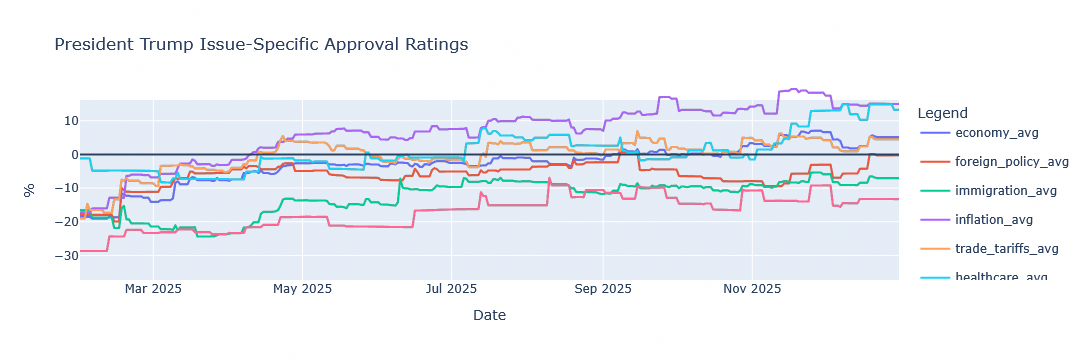

In [71]:
line = px.line(net_issues, x='Date', y=['economy_avg', 'foreign_policy_avg', 'immigration_avg', 'inflation_avg', 'trade_tariffs_avg', 'healthcare_avg',
                                       'crime_avg'])
line.update_traces(hovertemplate=None)
line.update_layout(hovermode='x unified')
fig = go.Figure(data=line.data)
fig.update_layout(
    title='President Trump Issue-Specific Approval Ratings',
    xaxis_title='Date',
    yaxis_title='%',
    legend_title='Legend',
    hovermode='x unified'
)
fig.add_hline(0)
fig.show()

In [72]:
net_issues.to_csv('net_approval_issues.csv')

In [73]:
def current_approval(data: pd.DataFrame, issue: str):
    yes_averages = []
    no_averages = []
    yes_stdevs = []
    no_stdevs = []
    issue_col = []
    date = datetime.datetime.today()
#         try:
    pipelined_df = avgs_pipeline(data, date, issue)
#         except TypeError:
#             print('TypeError')
#             print(date)
    yes_avg = np.sum(pipelined_df['approve_adj'] * pipelined_df['total_weights'])
    no_avg = np.sum(pipelined_df['disapprove_adj'] * pipelined_df['total_weights'])
    yes_std = np.sqrt(np.sum(pipelined_df['total_weights'] * (pipelined_df['approve_adj'] - yes_avg)**2))
    no_std = np.sqrt(np.sum(pipelined_df['total_weights'] * (pipelined_df['disapprove_adj'] - no_avg)**2))
    
    return {'issue': issue, 'approve': yes_avg, 'disapprove': no_avg, 'approve_std': yes_std, 'disapprove_std': no_std}

In [74]:
all_issues = np.unique(approval['issue'])
all_issues

array(['abortion', 'agriculture', 'ai', 'argentina_aid', 'ballroom',
       'border_security', 'cabinet', 'canada', 'charlie_kirk_death',
       'childcare', 'china', 'city_deployments', 'civil_liberties',
       'civil_rights', 'climate_change', 'consumer_protection',
       'corruption', 'crime', 'criminal_justice', 'cryptocurrency',
       'cybersecurity', 'dc_takeover', 'death_penalty', 'defense', 'dei',
       'democracy', 'deportations', 'diplomacy', 'disaster_relief',
       'doge', 'economy', 'education', 'energy', 'environment',
       'epstein_files', 'executive_orders', 'federal_workforce',
       'flooding_recent', 'foreign_aid', 'foreign_policy',
       'foreign_relations', 'free_speech', 'gas_prices',
       'govt_management', 'govt_shutdown', 'govt_spending', 'guns',
       'healthcare', 'housing', 'immigration', 'inequality', 'inflation',
       'iran', 'israel', 'israel_iran_conflict', 'israel_palestine',
       'jan_6_handling', 'jobs', 'judiciary_politicization',
   

In [75]:
qual_issue_polls = approval.groupby(['issue']).agg('count').reset_index()[['issue', 'pollster']]
qual_issue_polls = qual_issue_polls.rename({'pollster': 'count'}, axis=1)
qual_issue_polls = qual_issue_polls[qual_issue_polls['count'] > 3]
all_qual_issues = qual_issue_polls['issue'].values
qual_issue_polls.head()

,issue,count
0,abortion,22
5,border_security,27
12,civil_liberties,8
13,civil_rights,20
14,climate_change,21


In [76]:
qual_issue_polls = approval[approval['issue'].isin(all_qual_issues)]
issues_qual = []
for iss in all_qual_issues:
  if np.unique(qual_issue_polls[qual_issue_polls['issue'] == iss]['pollster']).shape[0] >= 2:
      issues_qual.append(iss)

issues_qual

['abortion',
 'border_security',
 'civil_rights',
 'climate_change',
 'corruption',
 'crime',
 'democracy',
 'deportations',
 'disaster_relief',
 'economy',
 'education',
 'energy',
 'environment',
 'epstein_files',
 'federal_workforce',
 'foreign_policy',
 'govt_management',
 'govt_shutdown',
 'govt_spending',
 'guns',
 'healthcare',
 'immigration',
 'inflation',
 'iran',
 'israel',
 'israel_iran_conflict',
 'israel_palestine',
 'military',
 'national_debt',
 'national_security',
 'race_relations',
 'russia',
 'taxes',
 'trade_tariffs',
 'ukraine',
 'unity']

In [77]:
approval['issue'].value_counts()[:20]

issue
economy              256
immigration          230
trade_tariffs        173
inflation            133
foreign_policy        94
healthcare            63
crime                 51
ukraine               48
education             38
israel_palestine      37
govt_spending         32
border_security       27
national_security     24
abortion              22
deportations          21
taxes                 21
guns                  21
climate_change        21
civil_rights          20
corruption            18
Name: count, dtype: int64

In [78]:
all_issues_approval = pd.DataFrame()

for issue in all_issues:
    row = current_approval(approval, issue)
    all_issues_approval = pd.concat([all_issues_approval, pd.DataFrame(row, index=[0])], axis=0)

In [79]:
all_issues_approval['net'] = all_issues_approval['approve'] - all_issues_approval['disapprove']
all_issues_approval = all_issues_approval.sort_values(['net'], ascending=False)
all_issues_approval = all_issues_approval.reset_index().drop(['index'], axis=1)

In [80]:
all_issues_approval

,issue,approve,disapprove,approve_std,disapprove_std,net
0,border_security,51.681048,47.608853,1.099125,2.077784,4.072194
1,national_security,46.682336,44.606539,1.752481,1.361390,2.075796
2,transgender,42.261272,41.756472,0.339552,0.176062,0.504800
3,crime,47.169976,49.087899,2.494589,3.506250,-1.917923
4,criminal_justice,39.392152,42.108775,0.673800,1.030954,-2.716622
...,...,...,...,...,...,...
88,stock_market,31.387369,66.612632,0.000000,0.000000,-35.225263
89,unity,31.489178,68.506927,0.086336,0.308781,-37.017749
90,national_debt,27.088365,64.855670,0.699089,1.044699,-37.767305
91,govt_shutdown,27.494644,67.721927,3.511816,8.979893,-40.227283


In [81]:
all_qual_issues_approval = pd.DataFrame()

for issue in issues_qual:
    row = current_approval(approval, issue)
    all_qual_issues_approval = pd.concat([all_qual_issues_approval, pd.DataFrame(row, index=[0])], axis=0)

In [82]:
all_qual_issues_approval['net'] = all_qual_issues_approval['approve'] - all_qual_issues_approval['disapprove']
all_qual_issues_approval = all_qual_issues_approval.sort_values(['net'], ascending=False)
all_qual_issues_approval = all_qual_issues_approval.reset_index().drop(['index'], axis=1)

In [83]:
len(issues_qual)

36

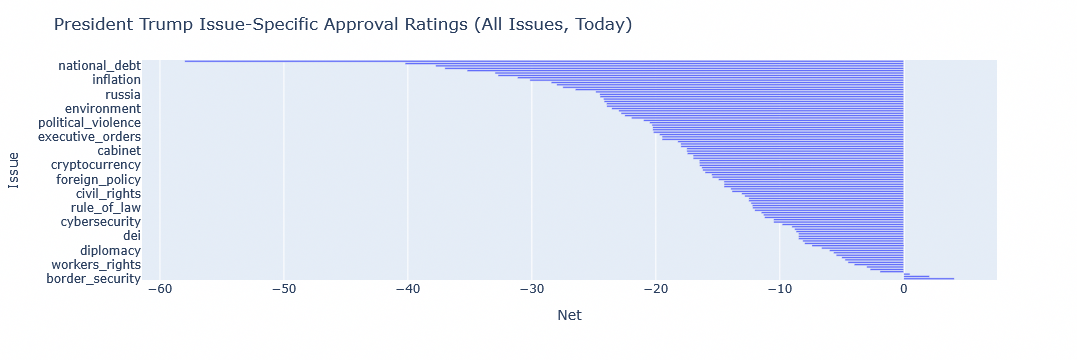

In [84]:
fig = px.bar(all_issues_approval, x='net', y='issue')
fig.update_layout(
    title='President Trump Issue-Specific Approval Ratings (All Issues, Today)',
    xaxis_title='Net',
    yaxis_title='Issue',
    legend_title='Legend',
)
fig.show()

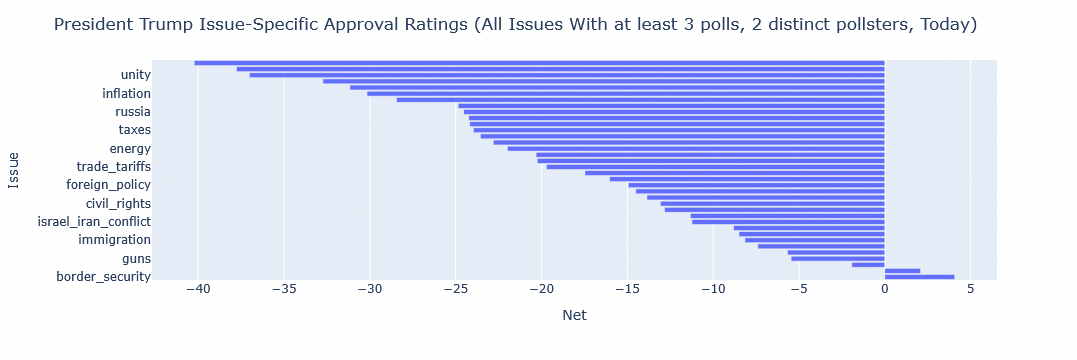

In [85]:
fig = px.bar(all_qual_issues_approval, x='net', y='issue')
fig.update_layout(
    title='President Trump Issue-Specific Approval Ratings (All Issues With at least 3 polls, 2 distinct pollsters, Today)',
    xaxis_title='Net',
    yaxis_title='Issue',
    legend_title='Legend',
)
fig.show()